<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_65_introduction_to_random_forest/Lecture_65_introduction_to_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries: numpy for numerical operations, pandas for data manipulation,
# and make_classification from sklearn.datasets to generate a synthetic dataset.

import numpy as np
import pandas  as pd
from sklearn.datasets import make_classification


In [2]:
# Generate a synthetic classification dataset with 100 samples, 5 features, 5 informative features,
# 0 redundant features, and 1 cluster per class.
X, y = make_classification( n_features=5, n_informative=5, n_redundant=0, n_clusters_per_class=1)

In [4]:
# Create a pandas DataFrame from the generated data X, assigning column names.
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
# Add the target variable y as a new column named 'target'.
df['target'] = y
# Print the shape of the DataFrame (number of rows and columns).
print(df.shape)
# Display the first 5 rows of the DataFrame to inspect the data.
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-3.211742,0.085219,-2.519348,-0.661609,2.335637,0
1,3.512015,-0.291307,0.277460,-2.889888,1.400494,1
2,0.428934,1.350050,-0.011956,-1.766383,2.439272,1
3,-0.943102,0.662529,-4.599270,1.015560,-1.404736,1
4,1.698140,0.568715,-0.129193,-3.234993,1.038735,1


In [5]:
from os import replace
import random
# function for row sampling

# Define a function to sample rows from a DataFrame with replacement.
# It takes a DataFrame and a percentage as input and returns a sampled DataFrame.
def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [67]:
# function for feature sampling

# Define a function to sample features (columns) from a DataFrame.
# It takes a DataFrame and a percentage as input.
def sample_features(df, percent):
  # Randomly select a percentage of columns excluding the 'target' column.
  cols = random.sample(df.columns.tolist()[:-1], int(percent*(df.shape[1]-1)))
  # Create a new DataFrame with the selected columns.
  new_df = df[cols]
  # Add the 'target' column back to the new DataFrame.
  new_df['target'] = df['target']
  return new_df

In [68]:
# function for combined sampling

# Define a function to perform combined row and feature sampling.
# It takes a DataFrame, row percentage, and column percentage as input.
def combined_sampling(df, row_percent, col_percent):
  # First, sample rows from the input DataFrame.
  new_df = sample_rows(df, row_percent)
  # Then, sample features from the row-sampled DataFrame and return the result.
  return sample_features(new_df, col_percent)

In [69]:
# df1 = sample_rows(df, 0.2)
# df2 = sample_rows(df, 0.2)
# df3 = sample_rows(df, 0.2)

In [94]:
# df1 = sample_features(df, 0.8)
# df2 = sample_features(df, 0.8)
# df3 = sample_features(df, 0.8)

In [112]:
# Perform combined sampling on the original DataFrame 'df' three times
# to create three different sampled DataFrames (df1, df2, df3).
# Each sampled DataFrame will have 50% of the original rows and 50% of the original features.
df1 = combined_sampling(df, 0.5, 0.5)
df2 = combined_sampling(df, 0.5, 0.5)
df3 = combined_sampling(df, 0.5, 0.5)

/tmp/ipython-input-67-346577333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipython-input-67-346577333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipython-input-67-346577333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [113]:
# Print the shape of the first sampled DataFrame (df1) to verify the number of rows and columns.
df1.shape

(50, 3)

In [114]:
# Print the shape of the second sampled DataFrame (df2) to verify the number of rows and columns.
oSlD3mc81AlG

(50, 3)

In [115]:
# Print the shape of the third sampled DataFrame (df3) to verify the number of rows and columns.
df3.shape

(50, 3)

In [116]:
# Display the first 5 rows of the original DataFrame 'df' again for comparison.
df.head()

,col1,col2,col3,col4,col5,target
0,-3.211742,0.085219,-2.519348,-0.661609,2.335637,0
1,3.512015,-0.291307,0.277460,-2.889888,1.400494,1
2,0.428934,1.350050,-0.011956,-1.766383,2.439272,1
3,-0.943102,0.662529,-4.599270,1.015560,-1.404736,1
4,1.698140,0.568715,-0.129193,-3.234993,1.038735,1


In [117]:
# Print the column names of each of the sampled DataFrames (df1, df2, and df3)
# to see which features were randomly selected for each.
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col4', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')


In [118]:
# Display the first 5 rows of the third sampled DataFrame (df3) to inspect its data and columns.
df3.head()

,col4,col5,target
25,0.679717,0.854388,0
20,1.701190,2.070328,0
65,0.424485,0.377273,1
45,1.549854,0.630202,0
88,-0.828487,3.065996,1


In [119]:
from sklearn.tree import DecisionTreeClassifier

# Import the DecisionTreeClassifier from sklearn.tree.
# Initialize three Decision Tree Classifier models (clf1, clf2, clf3).
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [120]:
# clf1.fit(df1.iloc[:,0:5], df1.iloc[:,-1])
# clf2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])
# clf3.fit(df3.iloc[:,0:5], df3.iloc[:,-1])

In [121]:
# clf1.fit(df1.iloc[:,0:4], df1.iloc[:,-1])
# clf2.fit(df2.iloc[:,0:4], df2.iloc[:,-1])
# clf3.fit(df3.iloc[:,0:4], df3.iloc[:,-1])

In [122]:
# Train each of the Decision Tree Classifiers on the respective sampled DataFrames.
# clf1 is trained on df1 using the first 2 columns as features and the last column as the target.
clf1.fit(df1.iloc[:,0:2], df1.iloc[:,-1])
# clf2 is trained on df2 using the first 2 columns as features and the last column as the target.
clf2.fit(df2.iloc[:,0:2], df2.iloc[:,-1])
# clf3 is trained on df3 using the first 2 columns as features and the last column as the target.
clf3.fit(df3.iloc[:,0:2], df3.iloc[:,-1])

DecisionTreeClassifier()

In [123]:
from sklearn.tree import plot_tree

# Import the plot_tree function from sklearn.tree to visualize the decision trees.

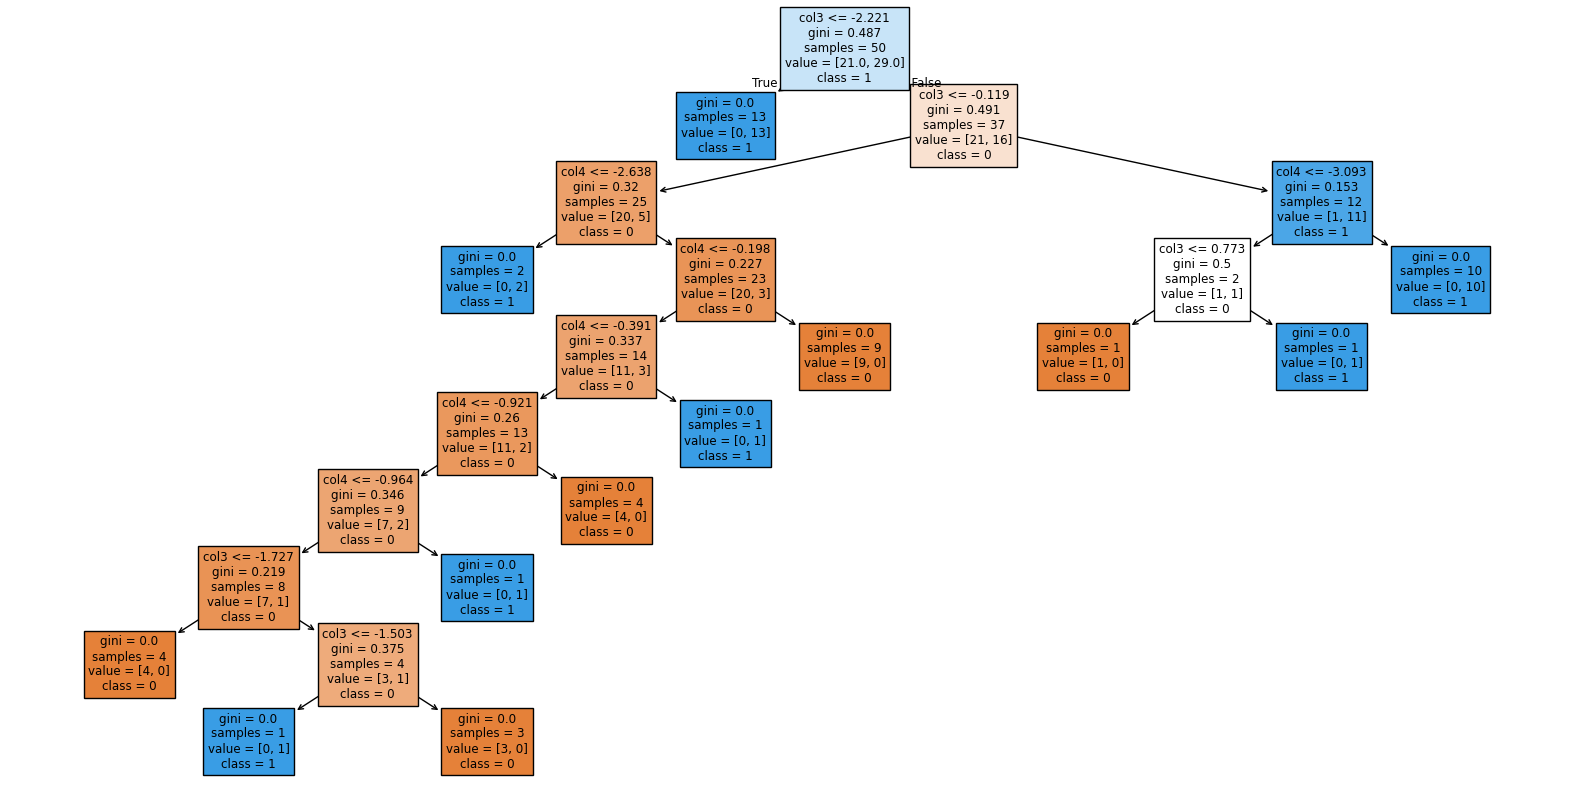

In [124]:
#  visualize decision tree properly uisng plot_tree

import matplotlib.pyplot as plt

# Import matplotlib.pyplot for plotting.
# Create a figure with a specified size for better visualization of the tree.
plt.figure(figsize=(20,10))
# Plot the first decision tree (clf1).
# filled=True colors the nodes based on the majority class.
# feature_names are taken from the columns of df1 (excluding the target).
# class_names are set to '0' and '1' for the target classes.
plot_tree(clf1, filled=True, feature_names=df1.columns[:-1].tolist(), class_names=['0', '1'])
# Display the plot.
plt.show()

In [125]:
# plot_tree(clf1)

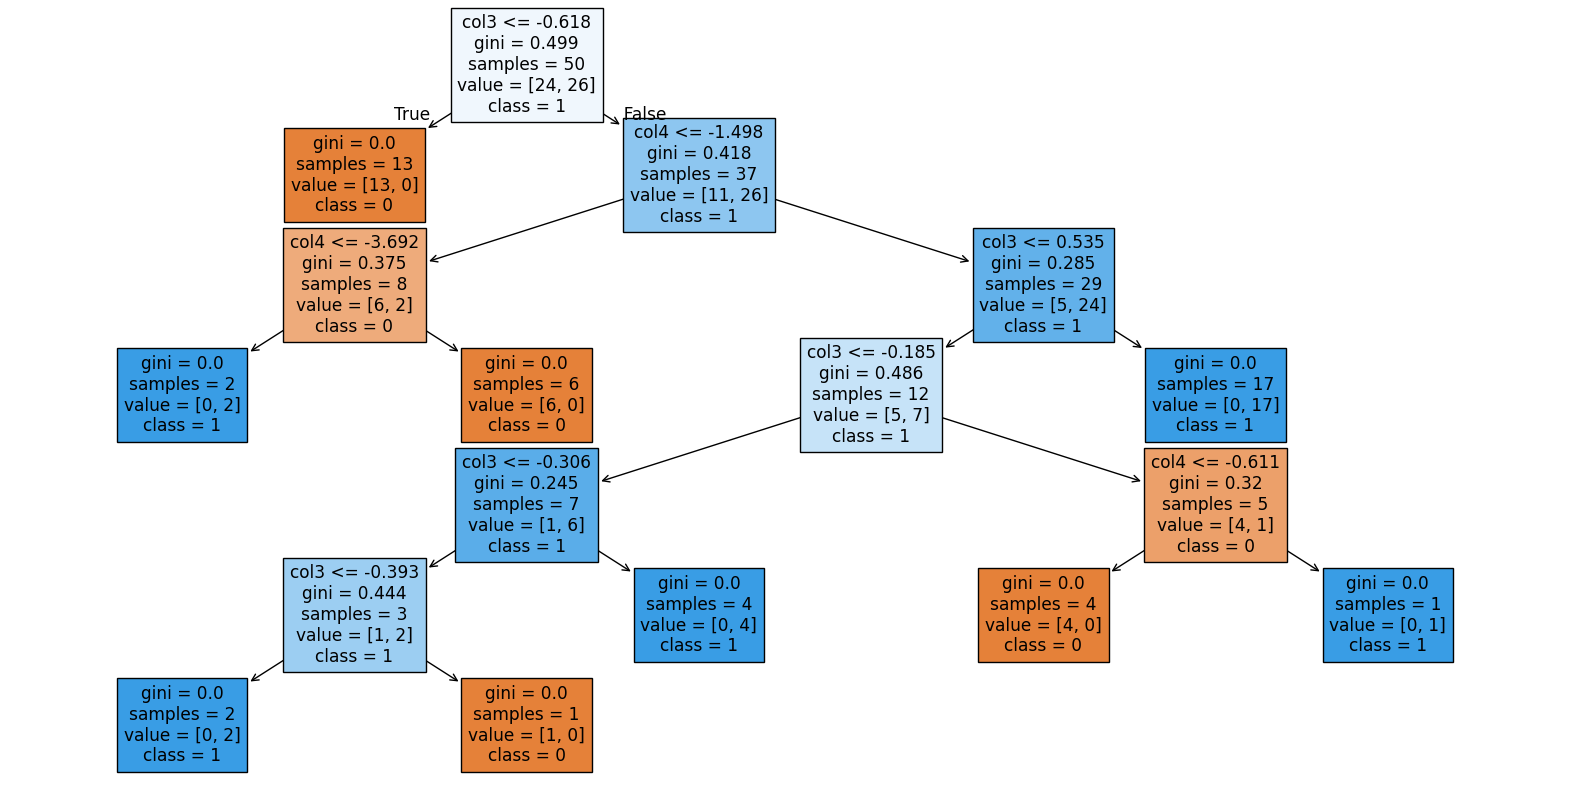

In [126]:
# Create a figure with a specified size for better visualization of the tree.
plt.figure(figsize=(20,10))
# Plot the second decision tree (clf2).
# filled=True colors the nodes based on the majority class.
# feature_names are taken from the columns of df1 (excluding the target) - Note: this might be a mistake, should likely be df2.columns[:-1].tolist()
# class_names are set to '0' and '1' for the target classes.
plot_tree(clf2, filled=True, feature_names=df1.columns[:-1].tolist(), class_names=['0', '1'])
# Display the plot.
plt.show()

In [127]:
# plot_tree(clf2)

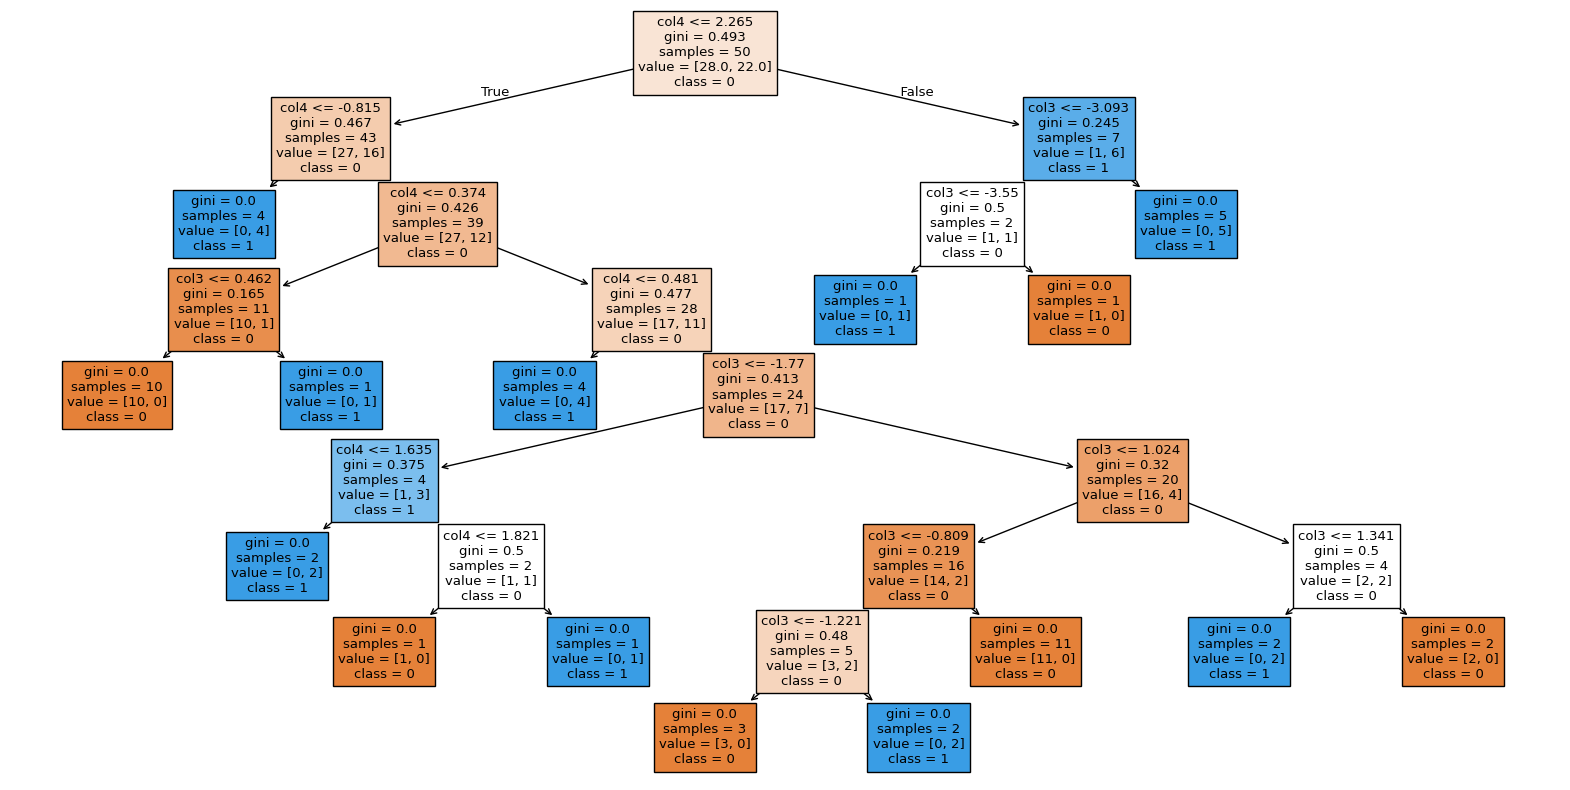

In [128]:
# Create a figure with a specified size for better visualization of the tree.
plt.figure(figsize=(20,10))
# Plot the third decision tree (clf3).
# filled=True colors the nodes based on the majority class.
# feature_names are taken from the columns of df1 (excluding the target) - Note: this might be a mistake, should likely be df3.columns[:-1].tolist()
# class_names are set to '0' and '1' for the target classes.
plot_tree(clf3, filled=True, feature_names=df1.columns[:-1].tolist(), class_names=['0', '1'])
# Display the plot.
plt.show()

In [129]:
# plot_tree(clf3)

In [136]:
# Use the first trained decision tree (clf1) to predict the class for a given input array.
# The input array is reshaped to a 2D array with one sample and two features to match the model's input shape.
clf1.predict(np.array([-0.828487,       3.065996]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [137]:
# Use the second trained decision tree (clf2) to predict the class for the same input array.
# The input array is reshaped to a 2D array with one sample and two features.
clf2.predict(np.array([-0.828487,       3.065996]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [138]:
# Use the third trained decision tree (clf3) to predict the class for the same input array.
# The input array is reshaped to a 2D array with one sample and two features.
clf3.predict(np.array([-0.828487,       3.065996]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])